# Current Mental Disorders in Tech Workers_Draft1

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

# Load and Display Raw Data

In [2]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

In [3]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

# Colors

In [4]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

# Answers

In [5]:
df_answers = pd.read_sql_query("SELECT * FROM Answer", db_survey)
df_answers.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


# Tech Workers in Tech Companies

In [6]:
df_Answer9 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

In [7]:
df_Answer9.count()

UserID    2888
dtype: int64

In [8]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [9]:
df_Answer13.count()

UserID    1471
dtype: int64

In [10]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [11]:
Total_TechinTech = df_TechinTech.count()
Total_TechinTech

UserID    909
dtype: int64

# Tech Workers with Current Mental Disorders

In [12]:
df_Answer33 = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 33 AND AnswerText = 'Yes'",
    db_survey
)
df_Answer33.head()

,UserID
0,1262
1,1264
2,1265
3,1266
4,1268


In [13]:
df_CurrentDisorder = pd.merge(df_TechinTech, df_Answer33 , on='UserID', how='inner')

In [14]:
df_CurrentDisorder.count()

UserID    379
dtype: int64

In [15]:
Total_CurrentDisorder = df_CurrentDisorder.count()
Total_CurrentDisorder.UserID

379

In [16]:
Total_NoCurrentDisorder = Total_TechinTech - Total_CurrentDisorder 
Total_NoCurrentDisorder.UserID

530

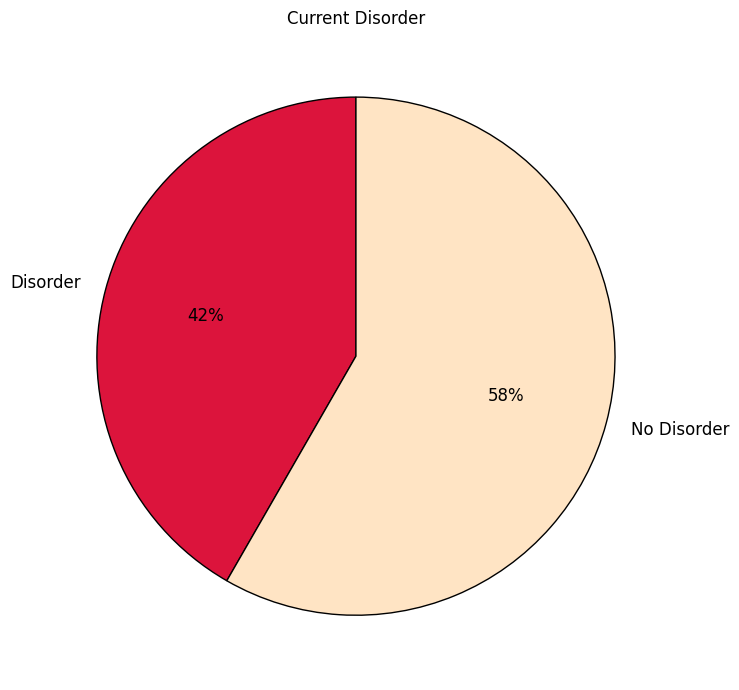

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(20, 7))

data = [Total_CurrentDisorder.UserID, Total_NoCurrentDisorder.UserID]

labels = ['Disorder', 'No Disorder']

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

axes.set_title("Current Disorder")

wedge = axes.pie(
    data,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 12},
    labels=labels
)


plt.tight_layout()

plt.show()